# 1. Understanding the Dataset and Question
#### 1.1 Data Exploration
#### 1.2 Outlier Investigation

## 1.1. Data Exploration
  - Total number of data points
  - Allocation across classes (POI/non-POI)
  - Number of features used
  - Are there features with many missing values
  

# 4. Import libraries



In [46]:
import numpy as np
import pandas as pd
import csv
import pickle
from pprint import pprint
import matplotlib.pyplot as plt 
from sklearn.cross_validation import train_test_split,StratifiedShuffleSplit
from sklearn import metrics
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
%matplotlib inline  

# 5. Loading file

In [14]:
FilePath = r'C:\Users\ares\Documents\PycharmProjects\ud120\final_project\final_project_dataset.pkl'
with open(FilePath, 'r') as data_file:
    data_dict = pickle.load(data_file)

### Full dataset is used in data exploration
### Transform dict to a pandas DataFrame
### rows for observation, columns for features
data_dict = pd.DataFrame(data_dict)
data_dict = data_dict.T

### replace string 'NaN' with null
data_dict = data_dict.replace(to_replace = 'NaN',value = np.nan)


## Overview of Data Structure

In [15]:
data_dict.head(1)

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
ALLEN PHILLIP K,4175000,2869717,-3081055,NaN,phillip.allen@enron.com,1729541,13868,2195,47,65,...,304805,152,False,126027,-126027,201955,1407,2902,4484442,1729541


### Check data profile by describe() function

In [16]:
data_dict.describe()

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
count,82.000000,39.000000,49.000000,17.000000,1.020000e+02,95.000000,86.000000,86.000000,86.000000,4.0000,66.000000,93.000000,146,1.100000e+02,18.000000,95.000000,86.000000,86.000000,1.250000e+02,1.260000e+02
mean,2374234.609756,1642674.153846,-1140475.142857,166804.882353,5.987054e+06,108728.915789,608.790698,64.895349,41.232558,41962500.0000,1470361.454545,919064.967742,0.123288,2.321741e+06,166410.555556,562194.294737,1176.465116,2073.860465,5.081526e+06,6.773957e+06
std,10713327.969046,5161929.973575,4025406.378506,319891.409747,3.106201e+07,533534.814109,1841.033949,86.979244,100.073111,47083208.7019,5942759.315498,4589252.907638,0.329899,1.251828e+07,4201494.314703,2716369.154553,1178.317641,2582.700981,2.906172e+07,3.895777e+07
min,70000.000000,-102500.000000,-27992891.000000,3285.000000,3.285000e+03,148.000000,12.000000,0.000000,0.000000,400000.0000,69223.000000,2.000000,False,-2.604490e+06,-7576788.000000,477.000000,2.000000,57.000000,1.480000e+02,-4.409300e+04
25%,431250.000000,81573.000000,-694862.000000,98784.000000,5.278862e+05,22614.000000,22.750000,10.000000,1.000000,1600000.0000,281250.000000,1215.000000,0,2.540180e+05,-389621.750000,211816.000000,249.750000,541.250000,3.944750e+05,4.945102e+05
50%,769375.000000,227449.000000,-159792.000000,108579.000000,1.310814e+06,46950.000000,41.000000,35.000000,8.000000,41762500.0000,442035.000000,52382.000000,0,4.517400e+05,-146975.000000,259996.000000,740.500000,1211.000000,1.101393e+06,1.102872e+06
75%,1200000.000000,1002671.500000,-38346.000000,113784.000000,2.547724e+06,79952.500000,145.500000,72.250000,24.750000,82125000.0000,938672.000000,362096.000000,0,1.002370e+06,-75009.750000,312117.000000,1888.250000,2634.750000,2.093263e+06,2.949847e+06
max,97343619.000000,32083396.000000,-833.000000,1398517.000000,3.117640e+08,5235198.000000,14368.000000,528.000000,609.000000,83925000.0000,48521928.000000,42667589.000000,True,1.303223e+08,15456290.000000,26704229.000000,5521.000000,15149.000000,3.098866e+08,4.345095e+08


### Total number of data points and features

In [17]:
data_dict.shape

(146, 21)

 - 146 data points
 - 20 features
 - 1 target

### Allocation across classes (POI/non-POI)

In [18]:
data_dict['poi'].value_counts()

False    128
True      18
Name: poi, dtype: int64

 - 'poi' has 128 observation
 - 'non-poi' has 18 observation

### Are there features with many missing values

In [19]:
data_dict.isnull().sum()

bonus                         64
deferral_payments            107
deferred_income               97
director_fees                129
email_address                 35
exercised_stock_options       44
expenses                      51
from_messages                 60
from_poi_to_this_person       60
from_this_person_to_poi       60
loan_advances                142
long_term_incentive           80
other                         53
poi                            0
restricted_stock              36
restricted_stock_deferred    128
salary                        51
shared_receipt_with_poi       60
to_messages                   60
total_payments                21
total_stock_value             20
dtype: int64

#### Following features have massive null values

 - deferral_payments 
 - director_fees
 - loan_advances
 - restricted_stock_deferred    

### convert data type to float except email

Remove email column

### feature list

In [20]:
# features_list = ["poi","total_payments", "total_stock_value",
#                  "from_poi_to_this_person","from_this_person_to_poi"
#     , "to_messages","shared_receipt_with_poi","from_messages"]

Only remaining necessary features

In [21]:
# data_dict = data_dict[features_list]
data_dict = data_dict.drop('email_address',axis = 1)

In [22]:
data_dict.head(3)

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
ALLEN PHILLIP K,4175000,2869717,-3081055,NaN,1729541,13868,2195,47,65,NaN,304805,152,False,126027,-126027,201955,1407,2902,4484442,1729541
BADUM JAMES P,NaN,178980,NaN,NaN,257817,3486,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,182466,257817
BANNANTINE JAMES M,NaN,NaN,-5104,NaN,4046157,56301,29,39,0,NaN,NaN,864523,False,1757552,-560222,477,465,566,916197,5243487


## Outlier Investigation 

In [23]:
data_dict.std(axis = 'index')

bonus                        10713327.969046
deferral_payments             5161929.973575
deferred_income               4025406.378506
director_fees                  319891.409747
exercised_stock_options      31062006.568836
expenses                       533534.814109
from_messages                    1841.033949
from_poi_to_this_person            86.979244
from_this_person_to_poi           100.073111
loan_advances                47083208.701900
long_term_incentive           5942759.315498
other                         4589252.907638
poi                                 0.329899
restricted_stock             12518278.177383
restricted_stock_deferred     4201494.314703
salary                        2716369.154553
shared_receipt_with_poi          1178.317641
to_messages                      2582.700981
total_payments               29061716.401161
total_stock_value            38957772.732279
dtype: float64

Check if there are outliers of 'total_payments' and 'total_stock_value'

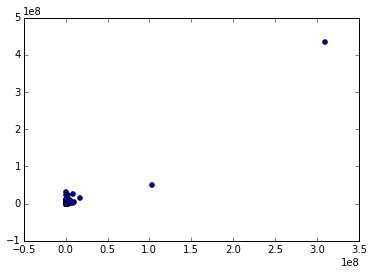

In [24]:
plt.scatter(data_dict['total_payments'],data_dict['total_stock_value'])

Look for index of outlier

In [25]:
data_dict['total_stock_value'].argmax()

'TOTAL'

Remove outlier

In [26]:
data_dict = data_dict.drop(['TOTAL'],axis = 'index')

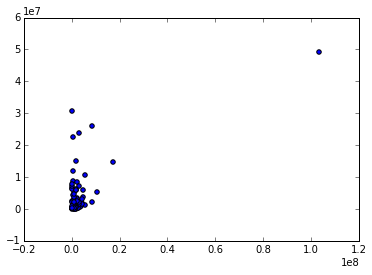

In [27]:
plt.scatter(data_dict['total_payments'],data_dict['total_stock_value'])

In [28]:
data_dict['total_stock_value'].argmax()

'LAY KENNETH L'

In [29]:
data_dict.loc['LAY KENNETH L']

bonus                              7e+06
deferral_payments                 202911
deferred_income                  -300000
director_fees                        NaN
exercised_stock_options      3.43484e+07
expenses                           99832
from_messages                         36
from_poi_to_this_person              123
from_this_person_to_poi               16
loan_advances                 8.1525e+07
long_term_incentive              3.6e+06
other                        1.03597e+07
poi                                 True
restricted_stock             1.47617e+07
restricted_stock_deferred            NaN
salary                       1.07232e+06
shared_receipt_with_poi             2411
to_messages                         4273
total_payments                1.0356e+08
total_stock_value            4.91101e+07
Name: LAY KENNETH L, dtype: object

Don't delete 'LAY KENNETH L' because it's a POI

Find observation which are identified as poi but doesn't have emails from poi

In [30]:
data_dict[(data_dict['poi']== True)&(data_dict['from_poi_to_this_person'].isnull())]


,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
FASTOW ANDREW S,1300000,NaN,-1386055,NaN,NaN,55921,NaN,NaN,NaN,NaN,1736055,277464,True,1794412,NaN,440698,NaN,NaN,2424083,1794412
HIRKO JOSEPH,NaN,10259,NaN,NaN,30766064,77978,NaN,NaN,NaN,NaN,NaN,2856,True,NaN,NaN,NaN,NaN,NaN,91093,30766064
KOPPER MICHAEL J,800000,NaN,NaN,NaN,NaN,118134,NaN,NaN,NaN,NaN,602671,907502,True,985032,NaN,224305,NaN,NaN,2652612,985032
YEAGER F SCOTT,NaN,NaN,NaN,NaN,8308552,53947,NaN,NaN,NaN,NaN,NaN,147950,True,3576206,NaN,158403,NaN,NaN,360300,11884758


Remove these observation as outliers

In [31]:
data_dict = data_dict.drop(data_dict.loc[ ((data_dict['poi']== True) 
                                           & (data_dict['from_poi_to_this_person'].isnull()))].index, axis = 0)

In [32]:
data_dict = data_dict.applymap(float)

## Create new features 

In [33]:
data_dict["from_this_person_to_poi_ratio"]=data_dict["from_this_person_to_poi"]/data_dict["from_messages"]
data_dict["from_poi_to_this_person_ratio"]=data_dict["from_poi_to_this_person"]/data_dict["to_messages"]

In [34]:
data_dict.head(3)

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,...,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value,from_this_person_to_poi_ratio,from_poi_to_this_person_ratio
ALLEN PHILLIP K,4175000,2869717,-3081055,NaN,1729541,13868,2195,47,65,NaN,...,0,126027,-126027,201955,1407,2902,4484442,1729541,0.029613,0.016196
BADUM JAMES P,NaN,178980,NaN,NaN,257817,3486,NaN,NaN,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,182466,257817,NaN,NaN
BANNANTINE JAMES M,NaN,NaN,-5104,NaN,4046157,56301,29,39,0,NaN,...,0,1757552,-560222,477,465,566,916197,5243487,0.000000,0.068905


## Properly scale features 

### normalize features
Split poi before normalize features

In [35]:
poi_mark = data_dict['poi']
data_dict = data_dict.drop('poi',axis = 1)
### check poi_mark
poi_mark.head(1)

ALLEN PHILLIP K    0
Name: poi, dtype: float64

In [36]:
data_dict.head(1)

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,...,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value,from_this_person_to_poi_ratio,from_poi_to_this_person_ratio
ALLEN PHILLIP K,4175000,2869717,-3081055,NaN,1729541,13868,2195,47,65,NaN,...,152,126027,-126027,201955,1407,2902,4484442,1729541,0.029613,0.016196


In [37]:
data_dict = (data_dict - data_dict.mean()) / (data_dict.max() - data_dict.min())
data_dict.head(1)

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,...,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value,from_this_person_to_poi_ratio,from_poi_to_this_person_ratio
ALLEN PHILLIP K,0.37445,0.307167,-0.718452,NaN,-0.026062,-0.172048,0.110491,-0.033893,0.039027,NaN,...,-0.045474,-0.057233,-0.043374,-0.074227,0.041771,0.054873,0.017571,-0.027625,-0.154443,-0.100153


In [38]:
### get back poi
# data_dict['poi'] = poi_mark
# data_dict.head(1)
labels = poi_mark

## Intelligently select features 

In [39]:
data_dict = data_dict.fillna(value = 0)
data_dict.head(1)

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,...,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value,from_this_person_to_poi_ratio,from_poi_to_this_person_ratio
ALLEN PHILLIP K,0.37445,0.307167,-0.718452,0,-0.026062,-0.172048,0.110491,-0.033893,0.039027,0,...,-0.045474,-0.057233,-0.043374,-0.074227,0.041771,0.054873,0.017571,-0.027625,-0.154443,-0.100153


In [40]:
KBest_f_classif = SelectKBest(f_classif, k=5).fit(data_dict, labels)
x_new = KBest_f_classif.get_support()
data_dict.columns[x_new]


Index([u'bonus', u'exercised_stock_options', u'salary', u'total_stock_value',
       u'from_this_person_to_poi_ratio'],
      dtype='object')

In [41]:
feature_scores = KBest_f_classif.scores_
feature_scores = pd.DataFrame(feature_scores)
feature_scores.index = data_dict.columns
feature_scores.sort_values([0],ascending=[False]).head(5)

,0
exercised_stock_options,20.797305
from_this_person_to_poi_ratio,16.726790
total_stock_value,16.097998
bonus,14.856237
salary,12.253767


In [42]:
data_dict_optimized_features = data_dict[data_dict.columns[x_new]]
data_dict_optimized_features.head(1)

,bonus,exercised_stock_options,salary,total_stock_value,from_this_person_to_poi_ratio
ALLEN PHILLIP K,0.37445,-0.026062,-0.074227,-0.027625,-0.154443


## Pick and Tune an Algorithm

Split traning and test dataset

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data_dict_optimized_features, labels
                                                    , test_size=0.3, random_state=42)

### Define function for cross validation

In [56]:
### Modified from test_classifier function in tester.py
def test_classifier(clf, features, labels, folds = 1000):
    ''' clf: class of ML
        features: contains feature data of observation
        labels: contains label of observation
        features and labels must be matched on index of pandas dataframe
        '''
#     data = featureFormat(dataset, feature_list, sort_keys = True)
#     # pprint(dataset)
#     labels, features = targetFeatureSplit(data)
#     print len(labels)
    cv = StratifiedShuffleSplit(labels, folds, random_state = 42)
#     print len(cv)
    true_negatives = 0
    false_negatives = 0
    true_positives = 0
    false_positives = 0
#     print cv
    for train_idx, test_idx in cv:
#         print train_idx
#         print '~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~'
#         print test_idx
        features_train = pd.DataFrame()
        features_test  = pd.DataFrame()
        labels_train   = pd.DataFrame()
        labels_test    = pd.DataFrame()
        features_train = features.iloc[train_idx]
        labels_train   = labels.iloc[train_idx]
        features_test  = features.iloc[test_idx]
        labels_test    = labels.iloc[test_idx]
        
        ### fit the classifier using training set, and test on test set
        clf.fit(features_train, labels_train)
        predictions = clf.predict(features_test)
        for prediction, truth in zip(predictions, labels_test):
            if prediction == 0 and truth == 0:
                true_negatives += 1
            elif prediction == 0 and truth == 1:
                false_negatives += 1
            elif prediction == 1 and truth == 0:
                false_positives += 1
            elif prediction == 1 and truth == 1:
                true_positives += 1
            else:
                print "Warning: Found a predicted label not == 0 or 1."
                print "All predictions should take value 0 or 1."
                print "Evaluating performance for processed predictions:"
                break
    try:
        total_predictions = true_negatives + false_negatives + false_positives + true_positives
        accuracy = 1.0*(true_positives + true_negatives)/total_predictions
        precision = 1.0*true_positives/(true_positives+false_positives)
        recall = 1.0*true_positives/(true_positives+false_negatives)
        f1 = 2.0 * true_positives/(2*true_positives + false_positives+false_negatives)
        f2 = (1+2.0*2.0) * precision*recall/(4*precision + recall)
        print clf
        print PERF_FORMAT_STRING.format(accuracy, precision, recall, f1, f2, display_precision = 5)
        print RESULTS_FORMAT_STRING.format(total_predictions, true_positives, false_positives, false_negatives, true_negatives)
        print ""
    except:
        print "Got a divide by zero when trying out:", clf
        print "Precision or recall may be undefined due to a lack of true positive predicitons."


### Pick an algorithm

Decision Tree

In [57]:
clf_tree = tree.DecisionTreeClassifier()
# clf_tree = clf_tree.fit(x_train, y_train)
# pred_tree = clf_tree.predict(x_test)
# print metrics.precision_score(y_test,pred_tree )
# print metrics.recall_score(y_test, pred_tree)
test_classifier(clf_tree,data_dict_optimized_features,labels)

StratifiedShuffleSplit(labels=[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.
  0.  0.  1.  0.  1.  0.  0.  0.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.
  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  1.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  1.  1.  0.  0.  0.  0.  0.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.], n_iter=1000, test_size=0.1, random_state=42)
[134 139  76   0  70  90  89 103  94  60  41  77  65 108  12   5  98  54
 133 104  37  38  86  46  20  62 124  73   3  18  51 135  35  85 100  15
  88  10  11 119  29  19  83  71  95  39 138  23 132 121  69 123 125  27
   4   8  45  30   1  72  47   2 127  61  43  87  57  28  17  82  74 115
  99   9  58 109   7  26 113  44 137  48  93  52  66 106 10

Naive Bayes

In [194]:
clf_nai = GaussianNB()
clf_nai.fit(x_train, y_train)
pred_nai = clf_nai.predict(x_test)
print metrics.precision_score(y_test, pred_nai)
print metrics.recall_score(y_test, pred_nai)

0.666666666667
0.5


Support Vector Machine

In [196]:
clf_svc = SVC(kernel = "rbf", C = 9)
clf_svc.fit(x_train, y_train)
pred_svc = clf_svc.predict(x_test)
print metrics.precision_score(y_test, pred_svc)
print metrics.recall_score(y_test, pred_svc)

0.0
0.0


### Parameter tunning

In [198]:
from sklearn import grid_search

In [207]:
from sklearn import grid_search
parameters = {'kernel':('linear', 'rbf'), 'C':[8, 10]}
svr = SVC()
clf_GSC = grid_search.GridSearchCV(svr, parameters)
clf_GSC.fit(x_train, y_train)
print clf_GSC.best_params_
# output: {'kernel': 'rbf', 'C': 8}

{'kernel': 'linear', 'C': 8}


#### Tunning decision tree

In [211]:
parameters_decision_tree = {'criterion':('gini', 'entropy'), 'splitter':('best', 'random'),'min_samples_split':[2,10]}
clf_tree_GSC = tree.DecisionTreeClassifier(criterion = 'gini')
clf_tree_GSC = grid_search.GridSearchCV(clf_tree_GSC, parameters_decision_tree)
clf_tree_GSC = clf_tree_GSC.fit(x_train, y_train)
clf_tree_GSC.best_params_

{'criterion': 'gini', 'min_samples_split': 10, 'splitter': 'random'}

In [216]:
clf_tree = tree.DecisionTreeClassifier(criterion = 'gini', min_samples_split=10,splitter= 'random')
clf_tree = clf_tree.fit(x_train, y_train)
pred_tree = clf_tree.predict(x_test)
print metrics.precision_score(y_test,pred_tree )
print metrics.recall_score(y_test, pred_tree)

0.0
0.0
